# Credit Card Default Dataset (Default Prediction)

## Aim: Compare if a client will be on default (won't pay his debt next month)
Proyecto: Comparar modelos en un mismo problema

Aprendes: GridSearchCV, validación cruzada

Comparas: LogisticRegression, KNN, RandomForest

## Dictionary of variables

## Setup

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# ML Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# ML metrics
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
# Cargar desde URL directa
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

In [ ]:
# Ver columnas y primeras filas
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Clean column names and spaces
df.columns = df.columns.str.strip()
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.dtypes

,0
ID,int64
LIMIT_BAL,int64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


<ipython-input-8-81c0c78688d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='Set2')


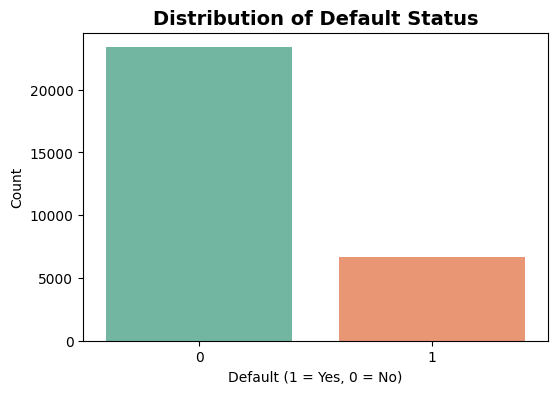

default
0    77.88%
1    22.12%
Name: proportion, dtype: object


In [ ]:
# # Overview of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df, palette='Set2')
plt.title('Distribution of Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

print(df['default'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

In [ ]:
# Numerical summary
df.describe().T[['mean', 'std', 'min', 'max']].sort_values(by='std', ascending=False)

,mean,std,min,max
LIMIT_BAL,167484.322667,129747.661567,10000.0,1000000.0
BILL_AMT1,51223.330900,73635.860576,-165580.0,964511.0
BILL_AMT2,49179.075167,71173.768783,-69777.0,983931.0
BILL_AMT3,47013.154800,69349.387427,-157264.0,1664089.0
BILL_AMT4,43262.948967,64332.856134,-170000.0,891586.0
BILL_AMT5,40311.400967,60797.155770,-81334.0,927171.0
BILL_AMT6,38871.760400,59554.107537,-339603.0,961664.0
PAY_AMT2,5921.163500,23040.870402,0.0,1684259.0
PAY_AMT6,5215.502567,17777.465775,0.0,528666.0
PAY_AMT3,5225.681500,17606.961470,0.0,896040.0


### Correlation heatmap (top 20 features only)

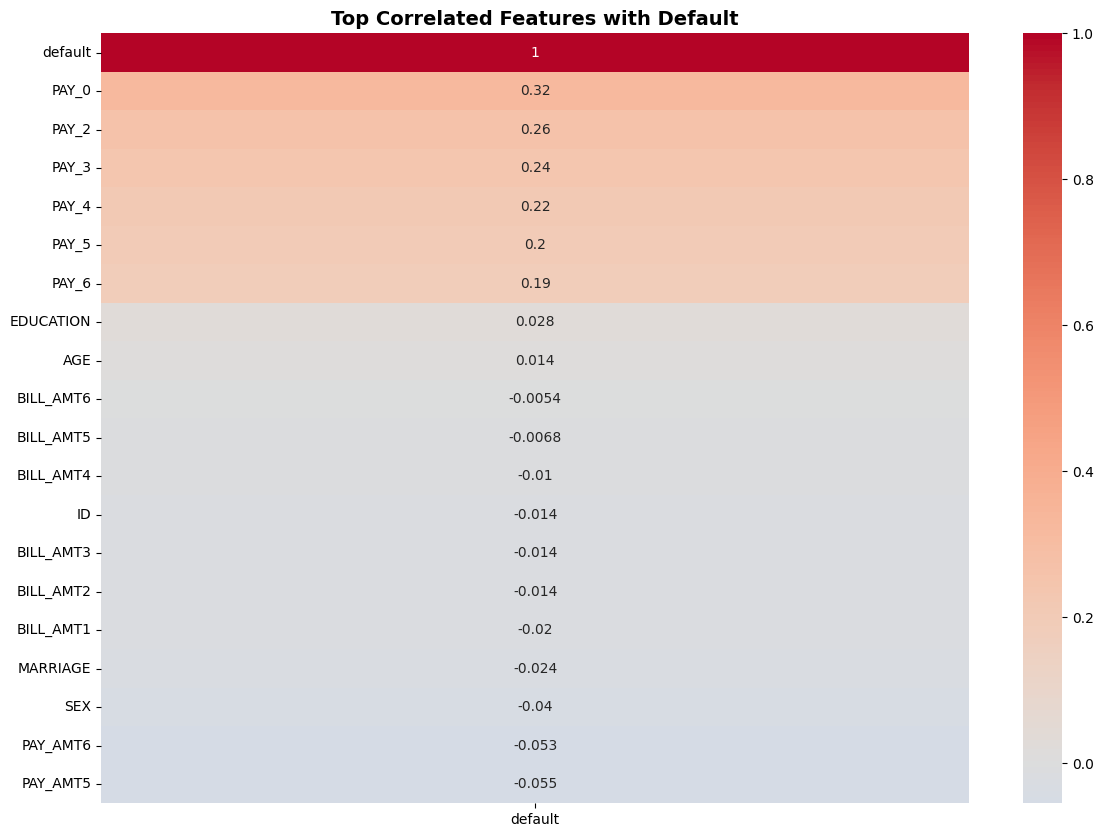

In [ ]:
# Select only numerical features
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot top correlations with target
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix[['default']].sort_values(by='default', ascending=False).head(20),
            annot=True, cmap='coolwarm', center=0)
plt.title('Top Correlated Features with Default', fontsize=14, fontweight='bold')
plt.show()

### Credit Limit vs. Default

<ipython-input-11-f67342e31055>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='LIMIT_BAL', data=df, palette='Set3')


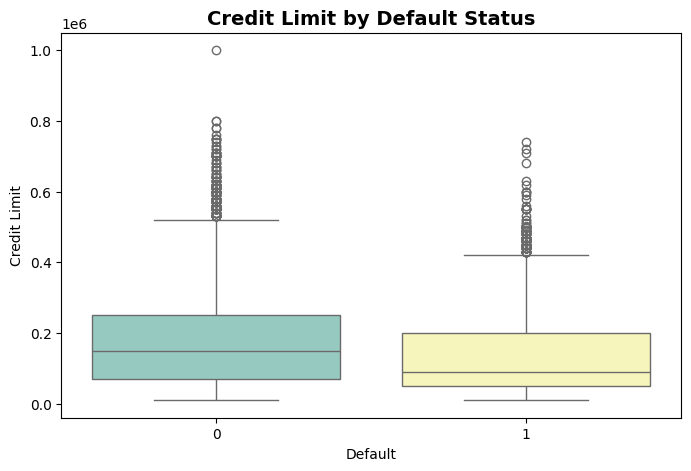

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='default', y='LIMIT_BAL', data=df, palette='Set3')
plt.title('Credit Limit by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default')
plt.ylabel('Credit Limit')
plt.show()

### Education, Gender and Marital Status

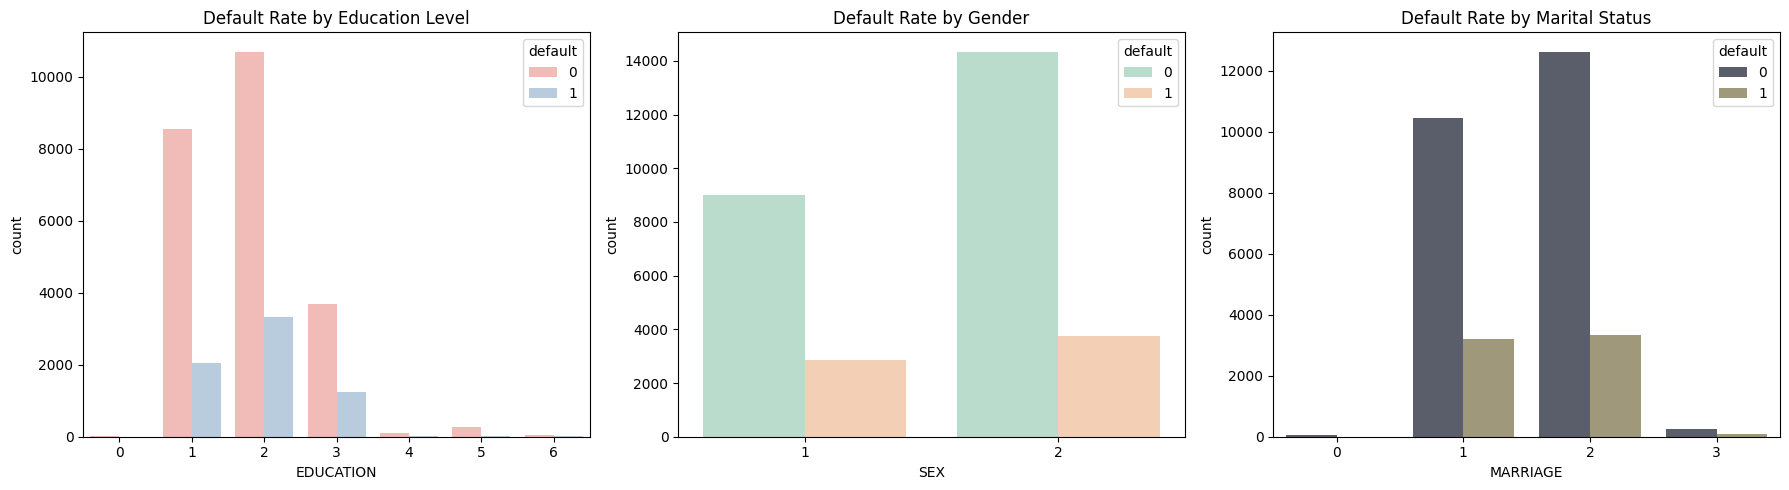

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='EDUCATION', hue='default', data=df, ax=axes[0], palette='Pastel1')
axes[0].set_title('Default Rate by Education Level')

sns.countplot(x='SEX', hue='default', data=df, ax=axes[1], palette='Pastel2')
axes[1].set_title('Default Rate by Gender')

sns.countplot(x='MARRIAGE', hue='default', data=df, ax=axes[2], palette='cividis')
axes[2].set_title('Default Rate by Marital Status')

plt.tight_layout()
plt.show()


### Outlier detection

In [ ]:
# Select key numerical columns for analysis
cols_to_check = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_0', 'PAY_2', 'PAY_3'
]

df[cols_to_check].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_AMT3,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0


#### Visualize ouliers using boxplots

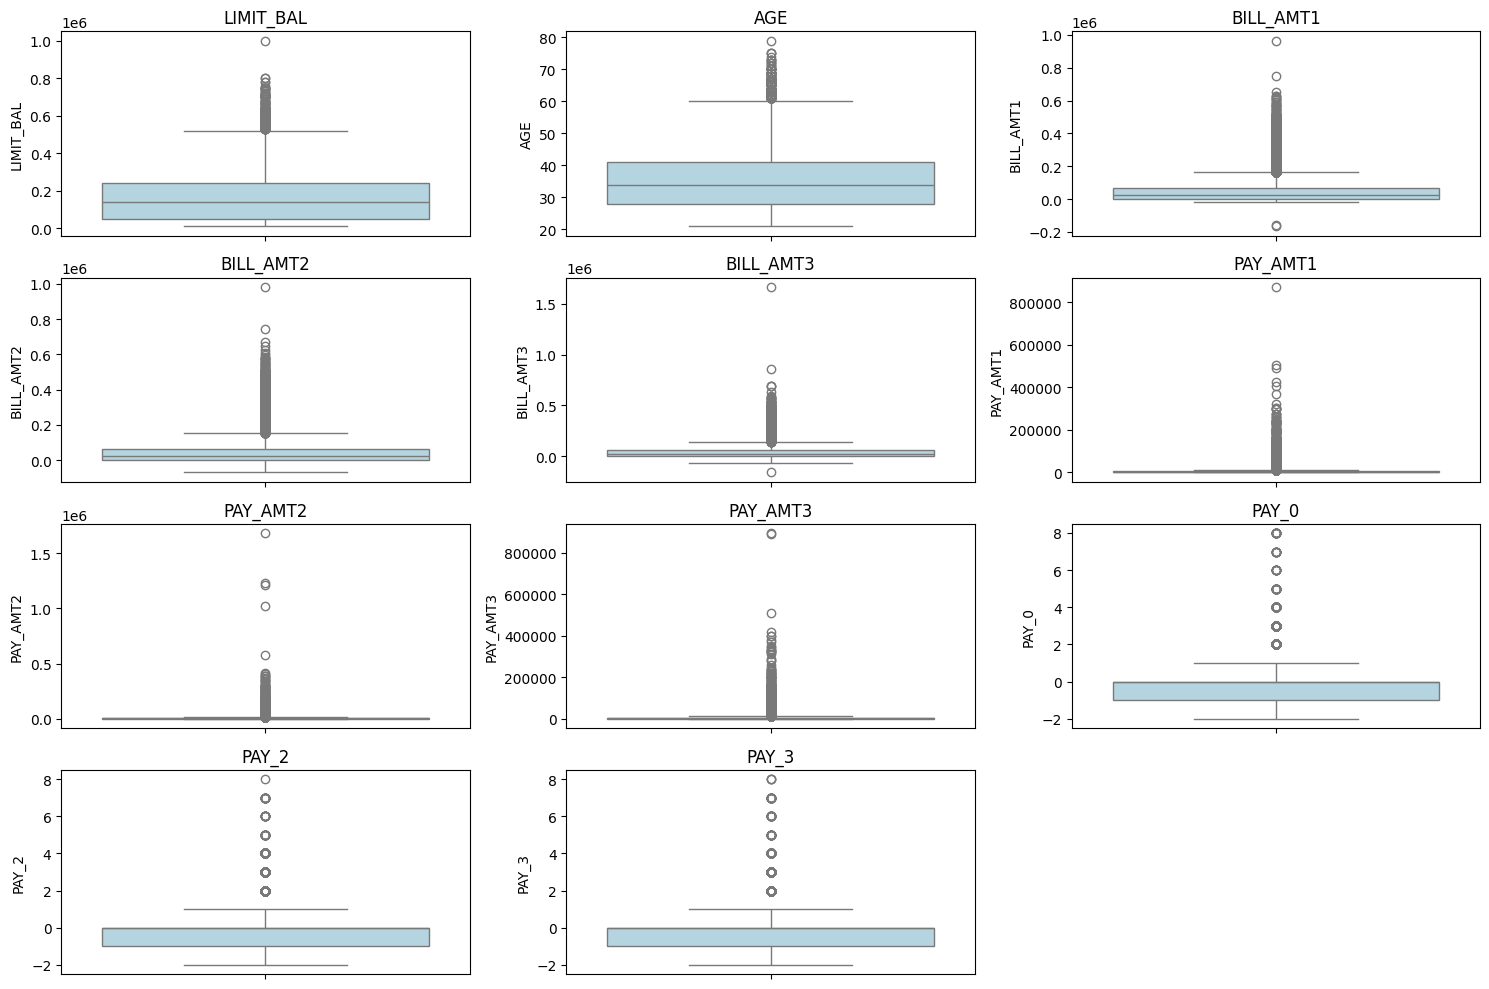

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

#### Zoom in on suspicious values

In [ ]:
# Example: unusually high or negative bill amounts
df[df['BILL_AMT1'] < 0][['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].head()

# Example: negative or zero payments
df[df['PAY_AMT1'] == 0][['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']].shape

(5249, 3)

#### IQR/based outlier filtering

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Example: find outliers in 'LIMIT_BAL'
outliers_limit = detect_outliers_iqr(df, 'LIMIT_BAL')
print(f"Outliers in LIMIT_BAL: {outliers_limit.shape[0]}")

Outliers in LIMIT_BAL: 167


## Machine Learning - Preprocessing

In [ ]:
# Drop the ID column (not useful for prediction)
df_clean = df.drop(columns=['ID'])

In [ ]:
# Encode categorical features
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df_clean[categorical_cols] = df_clean[categorical_cols].astype('category')

In [ ]:
# Separate features and target
X = df_clean.drop(columns=['default'])
y = df_clean['default']

In [ ]:
# Scale numerical features

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Train/Test split

# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

## Machine Learning - Training

### Supervised Learning: Hyperparameter Tuning and Performance Comparison

#### Define models and hyperparameter grids

In [ ]:
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    }
}

#### Use Stratified K-Fold for better class balance

In [ ]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, mp in model_params.items():
    print(f"🔧 Tuning: {name}")

    grid = GridSearchCV(mp['model'], mp['params'], cv=cv, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

🔧 Tuning: Logistic Regression
🔧 Tuning: KNN
🔧 Tuning: Random Forest


#### Create a summary table

In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)

# Format results
results_df['Accuracy'] = results_df['Accuracy'].apply(lambda x: f"{x:.3f}")
results_df['F1 Score'] = results_df['F1 Score'].apply(lambda x: f"{x:.3f}")
results_df['ROC AUC'] = results_df['ROC AUC'].apply(lambda x: f"{x:.3f}")

# Display
display(results_df)

,Model,Best Params,Accuracy,F1 Score,ROC AUC
2,Random Forest,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.818,0.459,0.775
1,KNN,"{'n_neighbors': 9, 'weights': 'uniform'}",0.804,0.429,0.725
0,Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.808,0.353,0.715


#### Visual comparison - Model performance chart

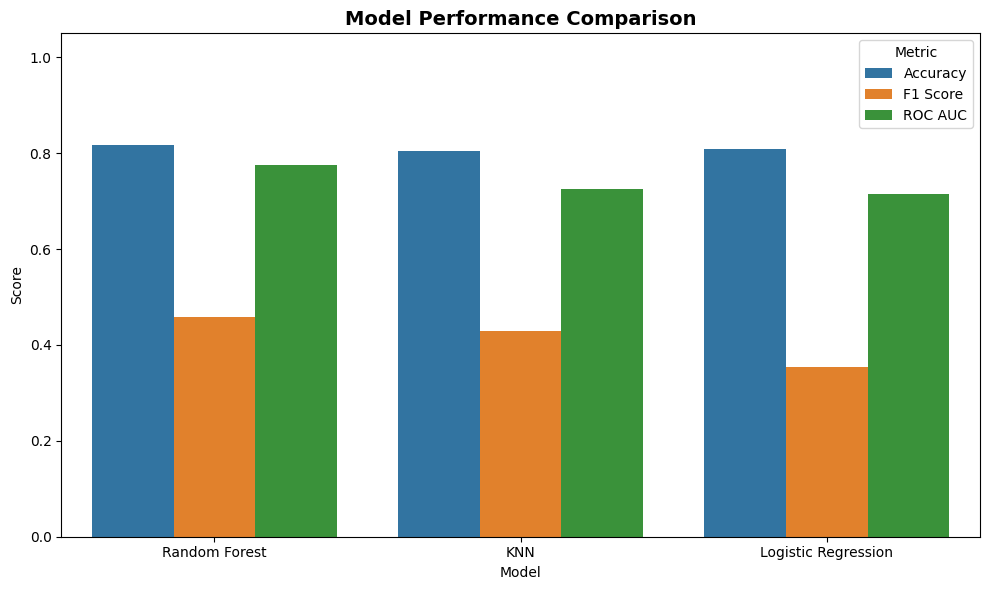

In [ ]:
# Melt the DataFrame for better plotting
plot_df = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1 Score', 'ROC AUC'],
                          var_name='Metric', value_name='Score')

# Convert Score back to float for plotting
plot_df['Score'] = plot_df['Score'].astype(float)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=plot_df, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()